   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    i

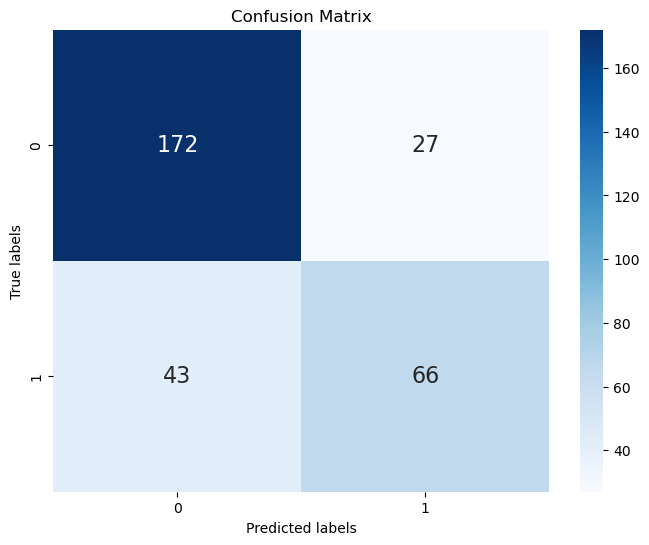

In [17]:
from tkinter import *
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

data = None
x_train=None ; x_test=None
y_train=None ; y_test = None
y_pred = None


def close_frame(f):
    f.destroy()

def load_dataset():
    global data
    path = load.get()
    data = pd.read_csv(path)
    return data

def info():
    print(data.head())
    print(40 * "-")
    print(data.info())
    print(40 * "-")
    print(data.isnull().sum())
    print(40 * "-")
    print(data.describe())
    print(40 * "**")

def Simple_Imputer(method, col_entry):
    global data
    cols = col_entry.split(" ")
    for i in range(len(cols)):
        cols[i] = int(cols[i])

    imputer = SimpleImputer(strategy=method)

    for col in cols:
        data.iloc[:, col]=imputer.fit_transform(data.iloc[:, col].values.reshape(-1, 1))
    return data

def One_Hot_Encoder():
    global data
    from sklearn.preprocessing import OneHotEncoder
    cols = data.columns[data.dtypes == object].tolist()
    encoder = OneHotEncoder()
    encoder.fit(data[cols])
    encoded_data =encoder.transform(data[cols])
    encoded_array = encoded_data.toarray()
    encoded_cols = encoder.get_feature_names_out(cols)

    encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols)
    data = pd.concat([ encoded_df,data.drop(columns=cols),], axis=1)
    

def Label_Encoder(col_entry):
    global data
    from sklearn.preprocessing import LabelEncoder

    cols = col_entry
    le = LabelEncoder()

    data[cols] = le.fit_transform(data[cols])
    return data
def MinMax_Scaler():
    global data
    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data))
    return data

def Standard_Scaler():
    global data

    x = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    st = StandardScaler()

    x = pd.DataFrame(st.fit_transform(x), columns=x.columns)

    data = pd.concat([x, y], axis=1)

    return data

def split(test_size):
    global x_train, x_test, y_train, y_test
    x = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=float(test_size), random_state=1)
    return x_train, x_test, y_train, y_test

def Random_Forest(test_size):
    global y_pred
    x_train, x_test, y_train, y_test = split(test_size)
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Done")
def Decision_tree(test_size):
    global y_pred
    x_train, x_test, y_train, y_test = split(test_size)
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Done")
def svc(test_size):
    global y_pred
    x_train, x_test, y_train, y_test = split(test_size)

    model = SVC()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Done")
def accuracy():
    global y_pred, y_test
    acc = accuracy_score(y_test, y_pred)
    print(acc)

def Precision():
    global y_pred, y_test
    pre = precision_score(y_test, y_pred , average='weighted', zero_division=0)
    print(pre)

def F1_measure():
    global y_pred, y_test
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    print(f1)

def Recall():
    global y_pred, y_test
    rec = recall_score(y_test, y_pred ,average='weighted', zero_division=0)
    print(rec)

def confusion_matrix():
    global y_pred, y_test
    from sklearn import metrics
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cm = metrics.confusion_matrix(y_test, y_pred)
    labels = np.unique(y_test)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")
    plt.show()


def strategy():
    farme_strat = Toplevel()
    farme_strat.title("method")
    farme_strat.geometry("400x300")
    label = Label(farme_strat, text="Which method you want to do?", font="tahoma 16 bold")
    label.pack()

    col_label = Label(farme_strat, text="Column number:")
    col_label.pack()
    col_entry = Entry(farme_strat)
    col_entry.pack()

    mean_but = Button(farme_strat, text="mean", fg='blue', bg='yellow', font="helvetica 14 bold", width=20,
                      command=lambda: Simple_Imputer("mean", col_entry.get()))
    mean_but.pack()
    median_but = Button(farme_strat, text="median", fg='blue', bg='yellow', font="helvetica 14 bold",
                        width=20, command=lambda: Simple_Imputer("median", col_entry.get()))
    median_but.pack()
    mode_but = Button(farme_strat, text="most_frequent", fg='blue', bg='yellow', font="helvetica 14 bold",
                      width=20, command=lambda: Simple_Imputer("most_frequent", col_entry.get()))
    mode_but.pack()

    exit_button = Button(farme_strat, text="Exit", fg='blue', bg='yellow', font="helvetica 14 bold", width=20,
                         command=lambda: close_frame(farme_strat))
    exit_button.pack(side="bottom", anchor="se")


def frame_pre():
    frame_pre = Toplevel()
    frame_pre.title("Preprocessing")
    frame_pre.geometry("500x400")
    label = Label(frame_pre, text="Which Preprocessing you want to do?", font="tahoma 16 bold")
    label.pack()

    impute_but = Button(frame_pre, text="SimpleImputer", fg='blue', bg='yellow', font="helvetica 14 bold",
                        width=20, command=strategy)
    impute_but.pack()

    col_label = Label(frame_pre, text="Column number:")
    col_label.pack()
    col_entry = Entry(frame_pre)
    col_entry.pack()
    
    label_but = Button(frame_pre, text="LabelEncoder", fg='blue', bg='yellow', font="helvetica 14 bold",
                       width=20, command=lambda: Label_Encoder(col_entry.get()))
    label_but.pack()
    
    one_but = Button(frame_pre, text="OneHotEncoder", fg='blue', bg='yellow', font="helvetica 14 bold",
                     width=20, command=lambda: One_Hot_Encoder())
    one_but.pack()

    

    minmax_but = Button(frame_pre, text="MinMaxScaler", fg='blue', bg='yellow', font="helvetica 14 bold",
                        width=20, command=MinMax_Scaler)
    minmax_but.pack()

    std_but = Button(frame_pre, text="StandardScaler", fg='blue', bg='yellow', font="helvetica 14 bold",
                     width=20, command=Standard_Scaler)
    std_but.pack()


    exit_button = Button(frame_pre, text="Exit", fg='blue', bg='yellow', font="helvetica 14 bold", width=20,
                         command=lambda: close_frame(frame_pre))
    exit_button.pack(side="bottom", anchor="se")


def frame_algo():
    frame_algo = Toplevel()
    frame_algo.title("Algorithms")
    frame_algo.geometry("500x300")
    label = Label(frame_algo, text="Which Algorithm you want to use?", font="tahoma 16 bold")
    label.pack()

    size = Label(frame_algo, text="test size : ")
    size.pack()

    size_entry = Entry(frame_algo)
    size_entry.pack()

    random_but = Button(frame_algo, text="Random Forest", fg='blue', bg='yellow', font="helvetica 14 bold",
                        width=20, command=lambda: Random_Forest(size_entry.get()))
    random_but.pack()

    tree_but = Button(frame_algo, text="Decision Tree", fg='blue', bg='yellow', font="helvetica 14 bold",
                      width=20, command=lambda: Decision_tree(size_entry.get()))
    tree_but.pack()

    cluster_but = Button(frame_algo, text="SVM", fg='blue', bg='yellow',
                         font="helvetica 14 bold", width=20, command=lambda: svc(size_entry.get()))
    cluster_but.pack()

    exit_button=Button(frame_algo,text="Exit",fg='blue',bg='yellow',font="helvatica 14 bold",
                       width=20,command=lambda: close_frame(frame_algo))
    exit_button.pack(side="bottom", anchor="se")
    
def frame_eval():
    frame_eval = Toplevel()
    frame_eval.title("Evaluation matrix")
    frame_eval.geometry("500x300")
    label = Label(frame_eval, text="Which Algorithm you want to use?", font="tahoma 16 bold")
    label.pack()
    
    acc_but=Button(frame_eval,text="Accuracy",fg='blue',bg='yellow',font="helvatica 14 bold",
                  width=20,command=accuracy)
    acc_but.pack()
    
    pre_but=Button(frame_eval,text="Precsion",fg='blue',bg='yellow',font="helvatica 14 bold",
                  width=20,command=Precision)
    pre_but.pack()
    
    f1_but=Button(frame_eval,text="F1 measure",fg='blue',bg='yellow',font="helvatica 14 bold",
                  width=20,command=F1_measure)
    f1_but.pack()
    
    recall_but=Button(frame_eval,text="Recall",fg='blue',bg='yellow',font="helvatica 14 bold",
                  width=20,command=Recall)
    recall_but.pack()
    
    conf_but=Button(frame_eval,text="confusion matrix",fg='blue',bg='yellow',font="helvatica 14 bold",
                  width=20,command=confusion_matrix)
    conf_but.pack()
    
    exit_button=Button(frame_eval,text="Exit",fg='blue',bg='yellow',font="helvatica 14 bold",
                       width=20,command=lambda: close_frame(frame_eval))
    exit_button.pack(side="bottom", anchor="se")
    
frame = Tk()
frame.title("Machine Learning Project")
frame.geometry("500x300")
label=Label(frame,text="Machine Learning Project",font="tahoma 16 bold")
label.pack()
load=Entry(frame,width=20)
load.pack()

to_load = Button(frame,text="load data" , fg='blue' ,bg='yellow',font="helvatica 14 bold",
                 width=20,command=load_dataset)
to_load.pack()

exit_button=Button(frame,text="Exit",fg='blue',bg='yellow',font="helvatica 14 bold",width=20,
                   command=lambda: close_frame(frame))
exit_button.pack(side="bottom", anchor="se")

info_butt=Button(frame,text="some info" , fg='blue' ,bg='yellow',font="helvatica 14 bold",
                 width=20,command=info)
info_butt.pack()

pre_butt=Button(frame,text="preprocessing", fg='blue' ,bg='yellow',font="helvatica 14 bold",
                width=20,command=frame_pre)
pre_butt.pack()



algo_butt=Button(frame,text="Alogrthim", fg='blue' ,bg='yellow',font="helvatica 14 bold",
                 width=20,command=frame_algo)
algo_butt.pack()

eval_butt=Button(frame,text="Evaluation matrix", fg='blue' ,bg='yellow',font="helvatica 14 bold",
                 width=20,command=frame_eval)
eval_butt.pack()
frame.mainloop()   

In [ ]:
C:\Users\ascom\Desktop\Data\Thyroid_Diff.csv

In [ ]:
C:\Users\ascom\Desktop\Data\Avian Influenza (HPAI).csv

In [ ]:
C:\Users\ascom\Desktop\Data\liver_cirrhosis (1).csv

In [ ]:
C:\Users\ascom\Desktop\Data\diabetes2.csv